2) Salary_hike -> Build a prediction model for Salary_hike
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
y = Salaary Hike
x = year experience

In [3]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Salary_Data.csv")

In [5]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.columns[0]

'YearsExperience'

In [10]:
data.shape

(30, 2)

In [11]:
#data types
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [12]:
data.iloc[0,:]

YearsExperience        1.1
Salary             39343.0
Name: 0, dtype: float64

In [13]:
data['YearsExperience']=pd.to_numeric(data['YearsExperience'],errors='coerce')
data['Salary']=pd.to_numeric(data['Salary'],errors='coerce')

In [14]:
#Count of duplicated rows
data[data.duplicated()].shape

(0, 2)

In [15]:
#Print the duplicated rows
#data[data.duplicated()]

<AxesSubplot:>

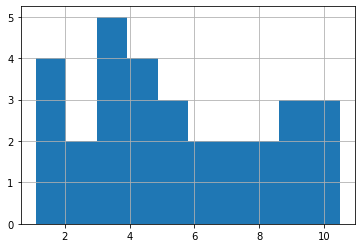

In [16]:
# histogram of 
data['YearsExperience'].hist()

<AxesSubplot:>

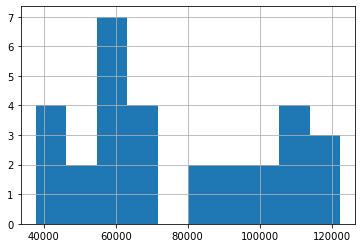

In [17]:
# histogram of 
data['Salary'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2701edbf10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2701e6c610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2701edbbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2701e6ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2701e76070>],
 'means': []}

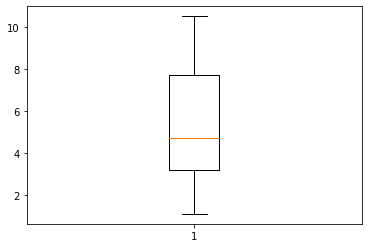

In [18]:
#Box plot

plt.boxplot(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2701e39f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2701e47610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2701e39bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2701e47cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2701e53070>],
 'means': []}

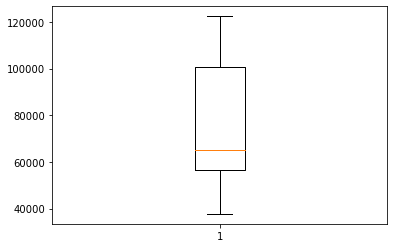

In [19]:
#Box plot

plt.boxplot(data['Salary'])

### There is no outliers in data.

<AxesSubplot:>

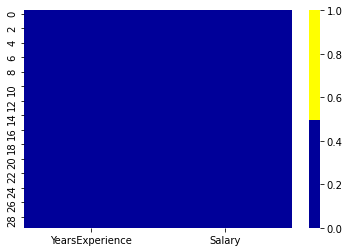

In [20]:
import seaborn as sns
cols = data.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours), vmin=0, vmax=1)

### Heat map shows the there is no null - value i.e. no yellow color in heat map.


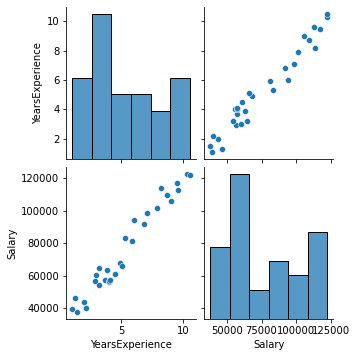

In [21]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data)

In [22]:
#Correlation
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### Linear association coefficient is 0.97, which shows that data is posively correlated. The value of r^2 is very near to 1, so the data is strongly linear associated. 

In [23]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [24]:
data.values

array([[1.10000e+00, 3.93430e+04],
       [1.30000e+00, 4.62050e+04],
       [1.50000e+00, 3.77310e+04],
       [2.00000e+00, 4.35250e+04],
       [2.20000e+00, 3.98910e+04],
       [2.90000e+00, 5.66420e+04],
       [3.00000e+00, 6.01500e+04],
       [3.20000e+00, 5.44450e+04],
       [3.20000e+00, 6.44450e+04],
       [3.70000e+00, 5.71890e+04],
       [3.90000e+00, 6.32180e+04],
       [4.00000e+00, 5.57940e+04],
       [4.00000e+00, 5.69570e+04],
       [4.10000e+00, 5.70810e+04],
       [4.50000e+00, 6.11110e+04],
       [4.90000e+00, 6.79380e+04],
       [5.10000e+00, 6.60290e+04],
       [5.30000e+00, 8.30880e+04],
       [5.90000e+00, 8.13630e+04],
       [6.00000e+00, 9.39400e+04],
       [6.80000e+00, 9.17380e+04],
       [7.10000e+00, 9.82730e+04],
       [7.90000e+00, 1.01302e+05],
       [8.20000e+00, 1.13812e+05],
       [8.70000e+00, 1.09431e+05],
       [9.00000e+00, 1.05582e+05],
       [9.50000e+00, 1.16969e+05],
       [9.60000e+00, 1.12635e+05],
       [1.03000e+01,

In [25]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


In [25]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

In [33]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [26]:
import pandas_profiling as pp
import sweetviz as sv

In [27]:
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report_salary.html')

/home/sachin/anaconda3/lib/python3.8/site-packages/pandas_profiling/visualisation/plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [28]:
sweet_report = sv.analyze(data)
sweet_report.show_html('Report_2.html')


Report Report_2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [26]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()   

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

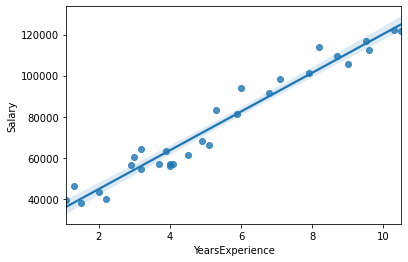

In [27]:
#ST, DT= pd.Series(data.ST, name="Sorting Time"), pd.Series(data.DT, name="Delivery Time")
sns.regplot(x="YearsExperience", y="Salary", data=data)

In [28]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    #pvlaues< 5% to accept the model

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [30]:
#R squared values
(model.rsquared,model.rsquared_adj)


(0.9569566641435086, 0.9554194021486339)

In [31]:
#Predict for salaray for
newdata=pd.Series([3.5, 4.5, 6.5])

In [32]:
newdata

0    3.5
1    4.5
2    6.5
dtype: float64

In [33]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [34]:
data_pred

,YearsExperience
0,3.5
1,4.5
2,6.5


In [35]:
model.predict(data_pred)

0    58867.068324
1    68317.030645
2    87216.955288
dtype: float64

## Simple linear regression using the transformation of the data

In [36]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [37]:
array = data.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]]


### Here I transfer the data using the min-max normalization 

In [38]:
df= pd.DataFrame(rescaledX,columns=['YearsExperience_scale', 'Salary_scale'])

In [39]:
df.head()

,YearsExperience_scale,Salary_scale
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [40]:
#Correlation
df.corr()


,YearsExperience_scale,Salary_scale
YearsExperience_scale,1.000000,0.978242
Salary_scale,0.978242,1.000000


In [41]:
import statsmodels.formula.api as smf
model1 = smf.ols("Salary_scale~YearsExperience_scale",data = df).fit()

<AxesSubplot:xlabel='YearsExperience_scale', ylabel='Salary_scale'>

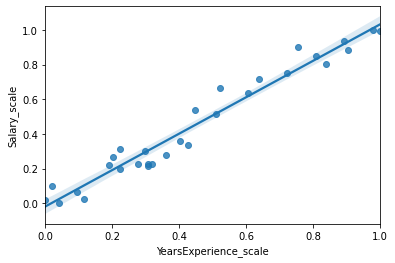

In [42]:
sns.regplot(x="YearsExperience_scale", y="Salary_scale", data=df)

In [43]:
model1.params

Intercept               -0.018236
YearsExperience_scale    1.049252
dtype: float64

In [44]:
#t and p-Values
print(model1.tvalues, '\n', model1.pvalues)    #pvlaues< 5% to accept the model1

Intercept                -0.806598
YearsExperience_scale    24.950094
dtype: float64 
 Intercept                4.266967e-01
YearsExperience_scale    1.143068e-20
dtype: float64


### pvalue is 1.14E-20, which is less than than 0.05, so we accept the model.

In [45]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

### R^2 value is 0.95, which is very close to the 1, so we can say that there is very strong linear association.

In [46]:
yrs_min = data["YearsExperience"].min()
salary_min = data["Salary"].min()



In [47]:
yrs_max = data["YearsExperience"].max()
salary_max = data["Salary"].max()

In [48]:
#Predict for salary
newdata1=pd.Series([3.5, 4.5, 6.5])

In [49]:
newdata1_scale = []
for i in newdata1:
    newdata1_scale.append((i-yrs_min)/(yrs_max-yrs_min))

In [50]:
newdata1_scale

[0.2553191489361702, 0.36170212765957444, 0.574468085106383]

In [51]:
data_pred1=pd.DataFrame(newdata1_scale,columns=['YearsExperience_scale'])

In [52]:
data_pred1.head()

,YearsExperience_scale
0,0.255319
1,0.361702
2,0.574468


In [53]:
a= model1.predict(data_pred1)

In [54]:
a

0    0.249658
1    0.361281
2    0.584526
dtype: float64

In [55]:
salary_new = []
for i in a:
   salary_new.append((i*(salary_max-salary_min)+salary_min))

### Here we get the predicted value of salary for years of experience list [3.5, 4.5, 6.5]

In [56]:

salary_new

[58867.06832376147, 68317.03064521655, 87216.95528812672]